##Фаза 2 - База на податоци и претпроцесирање 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
grade = pd.read_csv('drive/MyDrive/Grade.csv')
grade

name  patient ID  grade (GlaS)  grade (Sirinukunwattana et al. 2015)
0     testA_1           4        benign                           adenomatous
1    testA_10          10        benign                               healthy
2    testA_11           9        benign                               healthy
3    testA_12          11     malignant                 poorly differentiated
4    testA_13           7     malignant             moderately differentiated
..        ...         ...           ...                                   ...
160  train_82           2     malignant    moderately-to-poorly differentated
161  train_83          11     malignant                 poorly differentiated
162  train_84          15        benign                               healthy
163  train_85          10        benign                               healthy
164   train_9          10        benign                               healthy

[165 rows x 4 columns]

In [ ]:
from PIL import Image

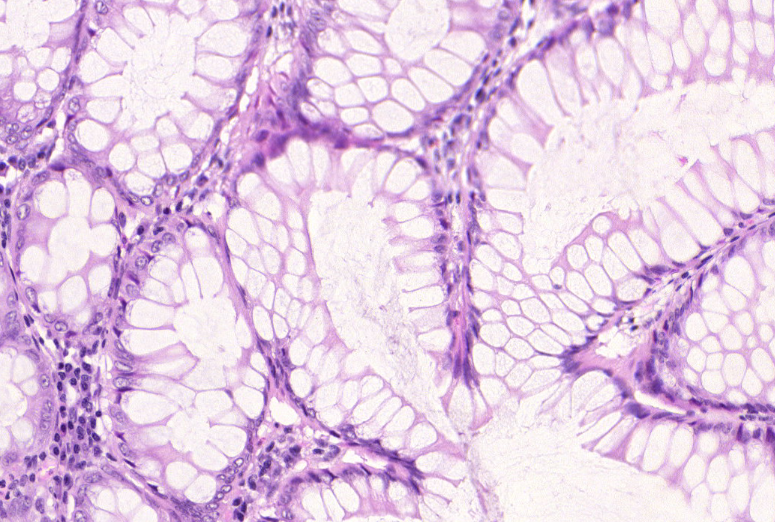

In [ ]:
import glob

file_paths = glob.glob("drive/MyDrive/images/*")
Image.open("drive/MyDrive/images/testA_1.bmp")

### Одвојување на податоците според името на сликата (препорачано од самата страна од каде ги симнав податоците) 

In [ ]:
train_data = grade[grade['name'].str.contains('train')]
test_data = grade[grade['name'].str.contains('test')]

In [ ]:
train_data

name  patient ID  grade (GlaS)  grade (Sirinukunwattana et al. 2015)
80    train_1           2     malignant             moderately differentiated
81   train_10           2     malignant             moderately differentiated
82   train_11          10     malignant                 poorly differentiated
83   train_12          13        benign                               healthy
84   train_13           1     malignant                 poorly differentiated
..        ...         ...           ...                                   ...
160  train_82           2     malignant    moderately-to-poorly differentated
161  train_83          11     malignant                 poorly differentiated
162  train_84          15        benign                               healthy
163  train_85          10        benign                               healthy
164   train_9          10        benign                               healthy

[85 rows x 4 columns]

In [ ]:
test_data

name  patient ID  grade (GlaS)  grade (Sirinukunwattana et al. 2015)
0    testA_1           4        benign                           adenomatous
1   testA_10          10        benign                               healthy
2   testA_11           9        benign                               healthy
3   testA_12          11     malignant                 poorly differentiated
4   testA_13           7     malignant             moderately differentiated
..       ...         ...           ...                                   ...
75   testB_5           5        benign                           adenomatous
76   testB_6           3     malignant             moderately differentiated
77   testB_7           5        benign                           adenomatous
78   testB_8           7     malignant             moderately differentiated
79   testB_9           1     malignant                 poorly differentiated

[80 rows x 4 columns]

### Додавање на сликите во grade.csv 

In [ ]:
names_ordered = list(train_data["name"])
images_ordered = []
for name in names_ordered:
  images_ordered.append(Image.open('drive/MyDrive/images/' + name + '.bmp'))

train_data['image'] = images_ordered
train_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


name  ...                                              image
80    train_1  ...  <PIL.BmpImagePlugin.BmpImageFile image mode=RG...
81   train_10  ...  <PIL.BmpImagePlugin.BmpImageFile image mode=RG...
82   train_11  ...  <PIL.BmpImagePlugin.BmpImageFile image mode=RG...
83   train_12  ...  <PIL.BmpImagePlugin.BmpImageFile image mode=RG...
84   train_13  ...  <PIL.BmpImagePlugin.BmpImageFile image mode=RG...
..        ...  ...                                                ...
160  train_82  ...  <PIL.BmpImagePlugin.BmpImageFile image mode=RG...
161  train_83  ...  <PIL.BmpImagePlugin.BmpImageFile image mode=RG...
162  train_84  ...  <PIL.BmpImagePlugin.BmpImageFile image mode=RG...
163  train_85  ...  <PIL.BmpImagePlugin.BmpImageFile image mode=RG...
164   train_9  ...  <PIL.BmpImagePlugin.BmpImageFile image mode=RG...

[85 rows x 5 columns]

In [ ]:
names_ordered = list(test_data["name"])
images_ordered = []
for name in names_ordered:
  images_ordered.append(Image.open('drive/MyDrive/images/' + name + '.bmp'))

test_data['image'] = images_ordered
test_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


name  ...                                              image
0    testA_1  ...  <PIL.BmpImagePlugin.BmpImageFile image mode=RG...
1   testA_10  ...  <PIL.BmpImagePlugin.BmpImageFile image mode=RG...
2   testA_11  ...  <PIL.BmpImagePlugin.BmpImageFile image mode=RG...
3   testA_12  ...  <PIL.BmpImagePlugin.BmpImageFile image mode=RG...
4   testA_13  ...  <PIL.BmpImagePlugin.BmpImageFile image mode=RG...
..       ...  ...                                                ...
75   testB_5  ...  <PIL.BmpImagePlugin.BmpImageFile image mode=RG...
76   testB_6  ...  <PIL.BmpImagePlugin.BmpImageFile image mode=RG...
77   testB_7  ...  <PIL.BmpImagePlugin.BmpImageFile image mode=RG...
78   testB_8  ...  <PIL.BmpImagePlugin.BmpImageFile image mode=RG...
79   testB_9  ...  <PIL.BmpImagePlugin.BmpImageFile image mode=RG...

[80 rows x 5 columns]

## Фаза 3 - Креирање на модели/Употреба на методи

Иснталација на постара верзија од keras и tensorflow за полесна конфигурација на моделот 

In [ ]:
!pip install q keras==1.2.2
!pip install tensorflow==1.14.0

     |████████████████████████████████| 175 kB 17.8 MB/s 
     |████████████████████████████████| 2.8 MB 48.0 MB/s 
  Created wheel for keras: filename=Keras-1.2.2-py3-none-any.whl size=209601 sha256=7990587d9affdb2125d1b7300d75975ce017a771f8e0ea0ffee3560d511ae71f
  Stored in directory: /root/.cache/pip/wheels/d1/32/23/2a1db3765ec19c91503843380a4f92b6530598949c661c5fa2
  Created wheel for theano: filename=Theano-1.0.5-py3-none-any.whl size=2668111 sha256=4d81825a6d07a252012435462c795c7a7957c699a1ae0d1de6a89914c709e53b
  Stored in directory: /root/.cache/pip/wheels/26/68/6f/745330367ce7822fe0cd863712858151f5723a0a5e322cc144
Successfully built keras theano
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.7

     |████████████████████████████████| 109.3 MB 55 kB/s 
     |████████████████████████████████| 488 kB 58.8 MB/s 
     |████████████████████████████████| 50 kB 8.8 MB/s 
     |████████████████████████████████| 3.1 MB 58.1 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.7.0
    Uninstalling tensorflow-2.7.0:
      Successfully uninstalled tensorflow-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.6 requires tensorflow>=2.0.0, but you

In [ ]:
import keras
import tensorflow as tf
print(keras.__version__)
print(tf.__version__)

Using TensorFlow backend.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

1.2.2
1.14.0


#### Делење на train и test множество

In [ ]:
import os 
import glob

file_paths = glob.glob("drive/MyDrive/images/*")
train_paths = [file_path for file_path in file_paths if "train" in file_path]
test_paths = [file_path for file_path in file_paths if "test" in file_path]
print("Number of train images: " + str(len(train_paths)))
print("Number of test images: " + str(len(test_paths)))

Number of train images: 170
Number of test images: 160


#### Генерирање бинарна верзија од сликите

Дополнително предпроцесирање на податоците и генерирање на train и test подмножеството.


In [ ]:
import os
import numpy as np

import cv2

image_rows = 522 # image height
image_cols = 775 # image width


def create_train_data():
    total = 85 # Train множеството без резултатите (без _anno)

    imgs = np.ndarray((total, 1, image_rows, image_cols), dtype=np.uint8)
    imgs_mask = np.ndarray((total, 1, image_rows, image_cols), dtype=np.uint8)

    print('Creating training images...')
    i = 0
    for image_name in train_paths:
        if 'anno' in image_name:
            continue
        image_mask_name = image_name.split('.')[0] + '_anno.bmp'
        #Додавање _anno на бинарните верзии од сликите

        img = cv2.imread(image_name, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (image_cols, image_rows))

        img_mask = cv2.imread(image_mask_name, cv2.IMREAD_GRAYSCALE)

        img_mask = cv2.resize(img_mask, (image_cols, image_rows))

        img = np.array([img])
        img_mask = np.array([img_mask])

        imgs[i] = img
        img_mask[img_mask != 0] = 255.0
        imgs_mask[i] = img_mask

        if i % 100 == 0:
            print('Done: {0}/{1} images'.format(i, total))
        i += 1

    print('Loading done.')

    np.save('imgs_train.npy', imgs)
    np.save('imgs_mask_train.npy', imgs_mask)
    print('Saving to .npy files done.')


def load_train_data():
    imgs_train = np.load('imgs_train.npy')
    imgs_mask_train = np.load('imgs_mask_train.npy')
    return imgs_train, imgs_mask_train


def create_test_data():
    total = 80

    imgs = np.ndarray((total, 1, image_rows, image_cols), dtype=np.uint8)

    i = 0
    print('-'*30)
    print('Creating test images...')
    print('-'*30)
    for image_name in test_paths:
        if 'anno' in image_name:
            continue
        img = cv2.imread(image_name, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (image_cols, image_rows))
        
        img = np.array([img])

        imgs[i] = img

    print('Loading done.')

    np.save('imgs_test.npy', imgs)
    print('Saving to .npy files done.')


def load_test_data():
    imgs_test = np.load('imgs_test.npy')
    return imgs_test

In [ ]:
create_train_data()
create_test_data()

Creating training images...
Done: 0/85 images
Loading done.
Saving to .npy files done.
------------------------------
Creating test images...
------------------------------
Loading done.
Saving to .npy files done.


#### Читање и тренирање на моделот 

Главно се користи keras пајтон библиотеката
- Сликите ги намалуваме на висина 100 пиксели и ширина 160 пиксели со помош на preprocess функцијата користејќи INTER_CUBIC техника на намалување на резолуција од cv2 библиотеката 

- Моделот е со пет слоја каде во секоја слој има: 
- - Convolutional2D
- - LeakyRelu activation function
- - SpatialDropout2D ја има истата функција како Dropout, но во SpatialDropout2D отфрлува цели 2D feature maps (со ова се подобруваат независностите на feature maps-от)
- - AveragePooling2D ја намалува димензијата на сликата, односно (2, 2) значи намалување на ширината и висината на сликата за пола 



In [ ]:
import cv2
import numpy as np
from keras.models import Model
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Input, merge, SpatialDropout2D
from keras.layers import Convolution2D, AveragePooling2D, UpSampling2D
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K


K.set_image_dim_ordering('th')  # Theano dimension ordering in this code

img_rows = 100
img_cols = 160
stack = 10

smooth = 1.


def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)


def create_model():
    input = Input(shape=(1, img_rows, img_cols))
    
    conv1 = Convolution2D(32, 3, 3, border_mode='same', init='he_normal')(input)
    conv1 = LeakyReLU()(conv1)
    conv1 = SpatialDropout2D(0.2)(conv1)
    conv1 = Convolution2D(32, 3, 3, border_mode='same', init='he_normal')(conv1)
    conv1 = LeakyReLU()(conv1)
    conv1 = SpatialDropout2D(0.2)(conv1)
    pool1 = AveragePooling2D(pool_size=(2,2))(conv1)
    
    conv2 = Convolution2D(64, 3, 3, border_mode='same', init='he_normal')(pool1)
    conv2 = LeakyReLU()(conv2)
    conv2 = SpatialDropout2D(0.2)(conv2)
    conv2 = Convolution2D(64, 3, 3, border_mode='same', init='he_normal')(conv2)
    conv2 = LeakyReLU()(conv2)
    conv2 = SpatialDropout2D(0.2)(conv2)
    pool2 = AveragePooling2D(pool_size=(2,2))(conv2)
    
    conv3 = Convolution2D(128, 3, 3, border_mode='same', init='he_normal')(pool2)
    conv3 = LeakyReLU()(conv3)
    conv3 = SpatialDropout2D(0.2)(conv3)
    conv3 = Convolution2D(128, 3, 3, border_mode='same', init='he_normal')(conv3)
    conv3 = LeakyReLU()(conv3)
    conv3 = SpatialDropout2D(0.2)(conv3)
    
    comb1 = merge([conv2, UpSampling2D(size=(2,2))(conv3)], mode='concat', concat_axis=1)
    conv4 = Convolution2D(64, 3, 3, border_mode='same', init='he_normal')(comb1)
    conv4 = LeakyReLU()(conv4)
    conv4 = SpatialDropout2D(0.2)(conv4)
    conv4 = Convolution2D(64, 3, 3, border_mode='same', init='he_normal')(conv4)
    conv4 = LeakyReLU()(conv4)
    conv4 = SpatialDropout2D(0.2)(conv4)
    
    comb2 = merge([conv1, UpSampling2D(size=(2,2))(conv4)], mode='concat', concat_axis=1)
    conv5 = Convolution2D(32, 3, 3, border_mode='same', init='he_normal')(comb2)
    conv5 = LeakyReLU()(conv5)
    conv5 = SpatialDropout2D(0.2)(conv5)
    conv5 = Convolution2D(32, 3, 3, border_mode='same', init='he_normal')(conv5)
    conv5 = LeakyReLU()(conv5)
    conv5 = SpatialDropout2D(0.2)(conv5)
    
    output = Convolution2D(1, 1, 1, activation='sigmoid')(conv5)

    model = Model(input=input, output=output)
    model.compile(optimizer=Adam(lr=3e-4), loss='binary_crossentropy')
    return model


def preprocess(imgs):
    imgs_p = np.ndarray((imgs.shape[0], imgs.shape[1], img_rows, img_cols), dtype=np.uint8)
    for i in range(imgs.shape[0]):
        imgs_p[i, 0] = cv2.resize(imgs[i, 0], (img_cols, img_rows), interpolation=cv2.INTER_CUBIC)
    return imgs_p

Сумаризација на моделот:

In [ ]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 1, 100, 160)   0                                            
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 32, 100, 160)  320         input_1[0][0]                    
____________________________________________________________________________________________________
leakyrelu_1 (LeakyReLU)          (None, 32, 100, 160)  0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
spatialdropout2d_1 (SpatialDropo (None, 32, 100, 160)  0           leakyrelu_1[0][0]                
___________________________________________________________________________________________

Со тестирање на повеќе различни конволуциски мрежи одлучив со горниот модел да продолжам, бидејќи добив најдобри резултати со извршување на моделот со една епоха (10 минути). Но за крајниот модел ќе треба над 50 епохи да се извршат што ќе трае долго. 

##Фаза 4

#### Процесирање на податоците (скалирање на пикселите за побрза конвергенција на моделот)

In [ ]:
print('-'*30)
print('Loading and preprocessing train data...')
print('-'*30)
imgs_train, imgs_mask_train = load_train_data()

imgs_train = preprocess(imgs_train)
imgs_mask_train = preprocess(imgs_mask_train)

imgs_train = imgs_train.astype('float32')
mean = np.mean(imgs_train)  
std = np.std(imgs_train)

imgs_train -= mean
imgs_train /= std

imgs_mask_train = imgs_mask_train.astype('float32')
imgs_mask_train /= 255.  # scale masks to [0, 1]

------------------------------
Loading and preprocessing train data...
------------------------------


#### Компајлирање

In [ ]:
print('-'*30)
print('Creating and compiling model...')
print('-'*30)
model = create_model()

print('-'*30)
print('Building data augmentation object...')
print('-'*30)
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    horizontal_flip=True,
    vertical_flip=True)
    
total = imgs_train.shape[0]
img = []
count = 0
for batch in datagen.flow(imgs_train, batch_size=1, seed=1337):
    img.append(batch)
    count += 1
    if count > total*stack:
        break
imgs_train = np.array(img)[:,0]

mask = [] 
count = 0
for batch in datagen.flow(imgs_mask_train, batch_size=1, seed=1337): 
    mask.append(batch)
    count += 1
    if count > total*stack:
        break
imgs_mask_train = np.array(mask)[:,0]
    
callbacks = [
    EarlyStopping(monitor='loss', patience=5, verbose=0),
    ModelCheckpoint('drive/MyDrive/weights1.hdf5', monitor='loss', save_best_only=True)
]

------------------------------
Creating and compiling model...
------------------------------

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
------------------------------
Building data augmentation object...
------------------------------


#### Тренирање на моделот со 25 епохи (време на тренирање одприлика 2 саати)

In [ ]:
print('-'*30)
print('Begin training...')
print('-'*30)
model.fit(imgs_train, imgs_mask_train, batch_size=4, nb_epoch=25, verbose=1, shuffle=True,callbacks=callbacks)

------------------------------
Begin training...
------------------------------


Epoch 1/25
851/851 [==============================] - 311s - loss: 0.7209   
Epoch 2/25
851/851 [==============================] - 298s - loss: 0.6682   
Epoch 3/25
851/851 [==============================] - 299s - loss: 0.6509   
Epoch 4/25
851/851 [==============================] - 297s - loss: 0.6313   
Epoch 5/25
851/851 [==============================] - 301s - loss: 0.6174   
Epoch 6/25
851/851 [==============================] - 303s - loss: 0.5982   
Epoch 7/25
851/851 [==============================] - 301s - loss: 0.5903   
Epoch 8/25
851/851 [==============================] - 301s - loss: 0.5822   
Epoch 9/25
851/851 [==============================] - 300s - loss: 0.5794   
Epoch 10/25
851/851 [==============================] - 299s - loss: 0.5710   
Epoch 11/25
851/851 [==============================] - 298s - loss: 0.5620   
Epoch 12/25
851/851 [==============================] - 302s - loss: 0

#### Предпроцесирање на test множеството

In [ ]:
print('-'*30)
print('Loading and preprocessing test data...')
print('-'*30)
imgs_test = load_test_data()
imgs_test = preprocess(imgs_test)

imgs_test = imgs_test.astype('float32')
imgs_test -= mean
imgs_test /= std

------------------------------
Loading and preprocessing test data...
------------------------------


#### Во случај да треба од поново да го тестирам моделот, ги зачував тежините на моделот 

In [ ]:
print('-'*30)
print('Loading saved weights...')
print('-'*30)
model.load_weights('drive/MyDrive/weights.hdf5')

------------------------------
Loading saved weights...
------------------------------




#### Тестирање, и зачувување на резултатите

In [ ]:
print('-'*30)
print('Predicting masks on test data...')
print('-'*30)
imgs_mask_test = model.predict(imgs_test, verbose=1)
np.save('imgs_mask_test.npy', imgs_mask_test)

------------------------------
Predicting masks on test data...
------------------------------
80/80 [==============================] - 8s     


#### Визуелизација на резултатите

In [ ]:
import numpy as np
import cv2

image_rows = 522 # image height
image_cols = 775 # image width

def prep(img):
    img = img.astype('float32')
    img = cv2.threshold(img, 0.50, 1., cv2.THRESH_BINARY)[1].astype(np.uint8)
    img = cv2.resize(img, (image_cols, image_rows))
    return img


def run_length_enc(label):
    from itertools import chain
    x = label.transpose().flatten()
    y = np.where(x > 0)[0]
    if len(y) < 10:  # consider as empty
        return ''
    z = np.where(np.diff(y) > 1)[0]
    start = np.insert(y[z+1], 0, y[0])
    end = np.append(y[z], y[-1])
    length = end - start
    res = [[s+1, l+1] for s, l in zip(list(start), list(length))]
    res = list(chain.from_iterable(res))
    return ' '.join([str(r) for r in res])


def submission():
    imgs_test, imgs_id_test = load_test_data()
    imgs_test = np.load('imgs_mask_test.npy')

    argsort = np.argsort(imgs_id_test)
    imgs_id_test = imgs_id_test[argsort]
    imgs_test = imgs_test[argsort]

    total = imgs_test.shape[0]
    ids = []
    rles = []
    for i in range(total):
        img = imgs_test[i, 0]
        img = prep(img)
        rle = run_length_enc(img)

        rles.append(rle)
        ids.append(imgs_id_test[i])

        if i % 100 == 0:
            print('{}/{}'.format(i, total))

    first_row = 'img,pixels'
    file_name = 'submission.csv'

    with open(file_name, 'w+') as f:
        f.write(first_row + '\n')
        for i in range(total):
            s = str(ids[i]) + ',' + rles[i]
            f.write(s + '\n')

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



def visualize_results():
    images  = np.load('imgs_test.npy')
    results = np.load('imgs_mask_test.npy')
    
    total = results.shape[0]
    for i in range(total):
        f, axarr = plt.subplots(1,2)
        image = images[i,0]
        image = cv2.resize(image, (image_cols, image_rows))
        result = results[i,0]
        result = prep(result)

        axarr[0].imshow(image, cmap='Greys')
        axarr[1].imshow(result, alpha=0.30)
        plt.show()

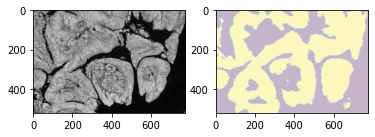

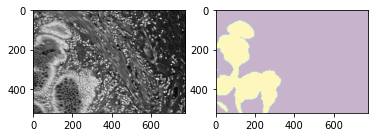

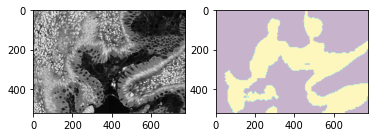

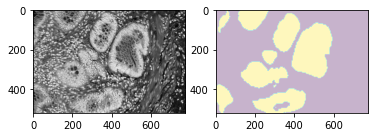

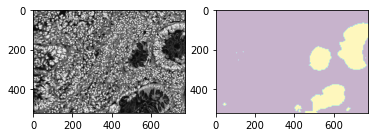

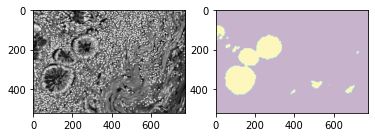

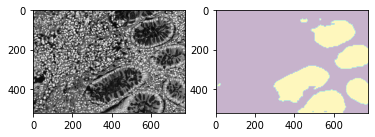

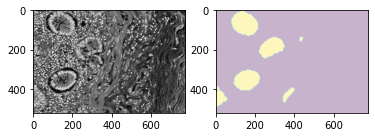

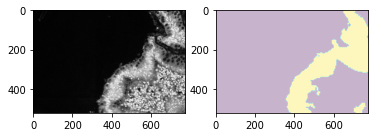

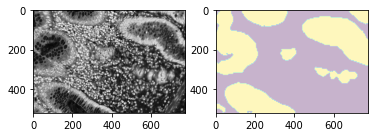

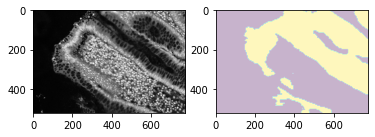

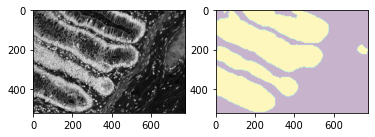

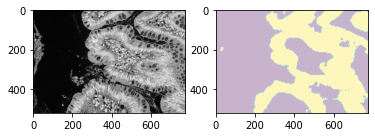

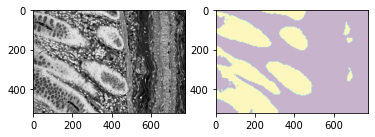

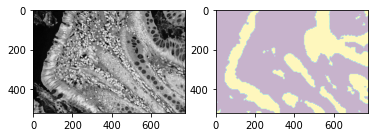

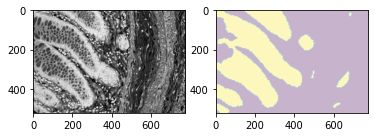

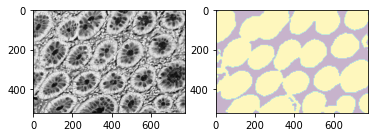

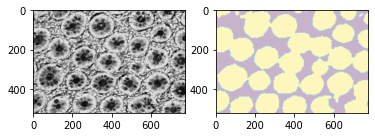

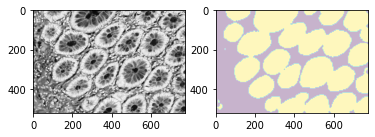

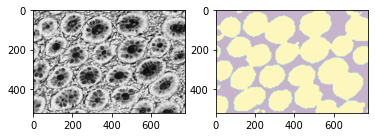

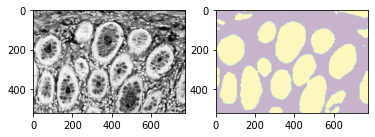

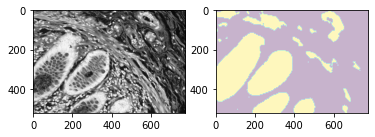

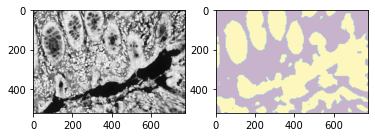

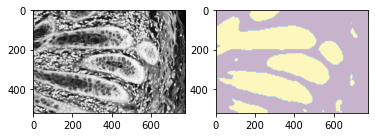

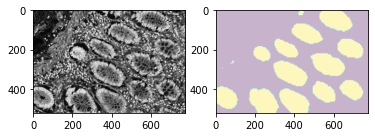

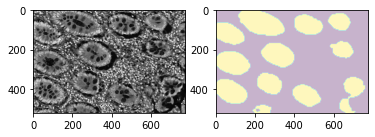

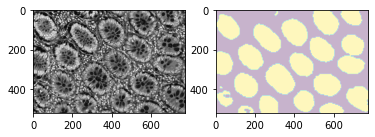

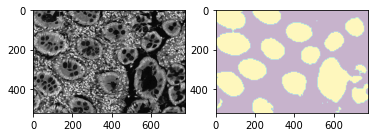

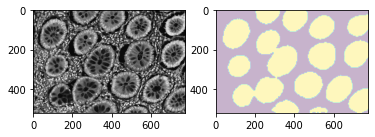

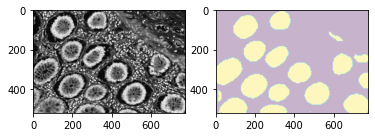

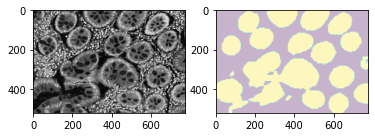

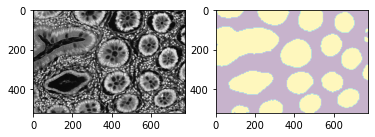

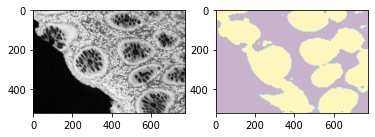

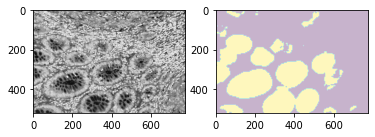

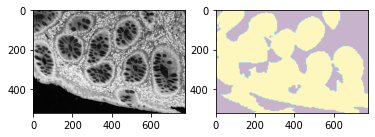

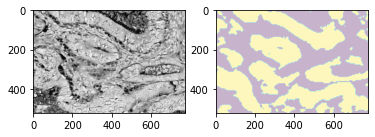

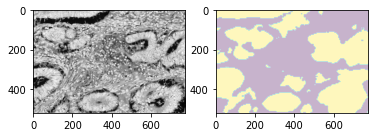

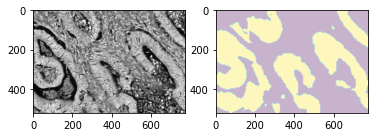

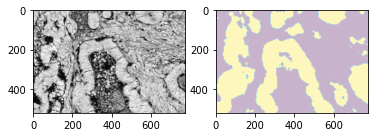

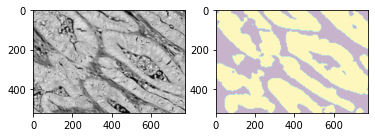

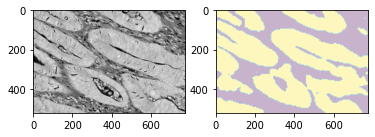

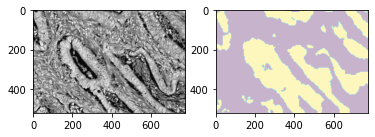

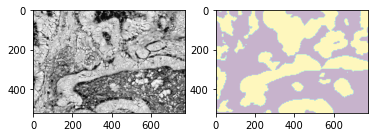

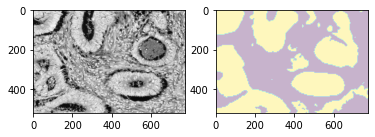

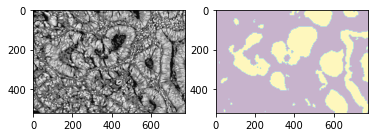

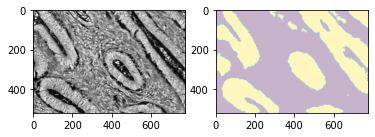

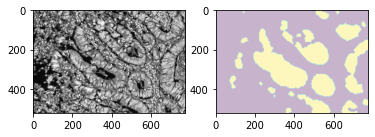

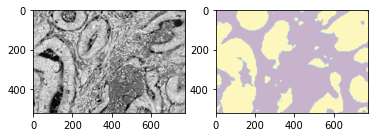

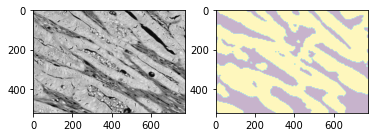

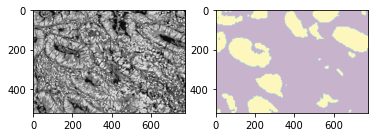

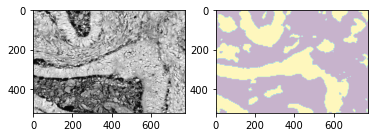

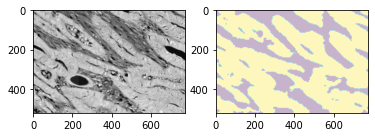

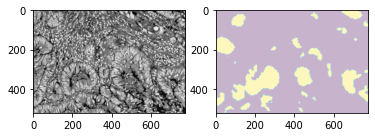

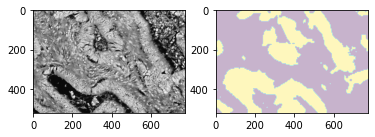

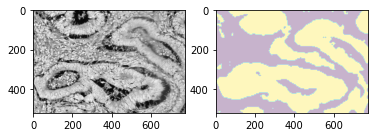

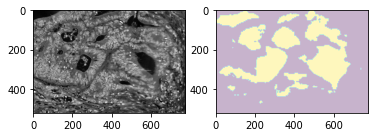

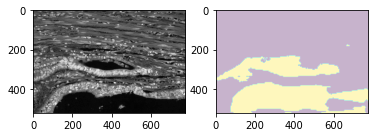

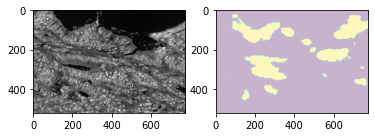

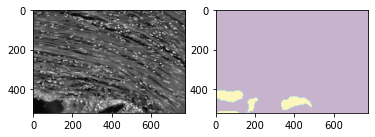

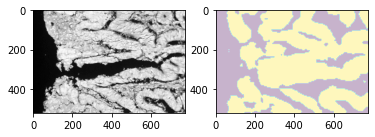

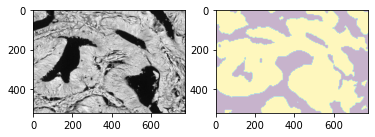

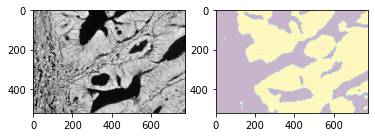

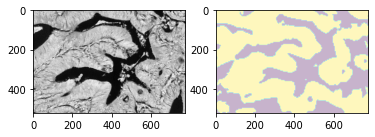

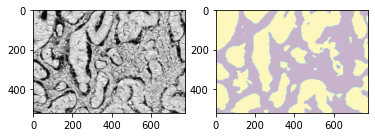

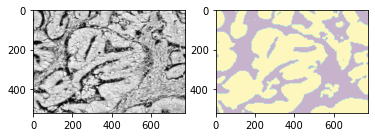

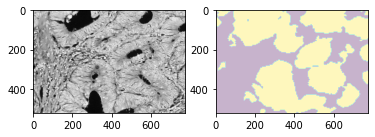

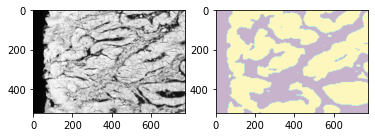

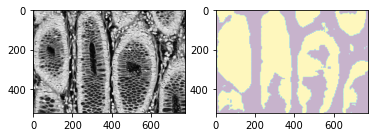

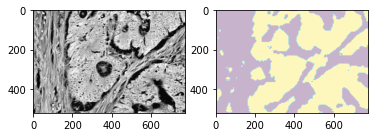

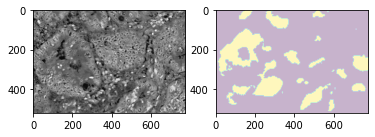

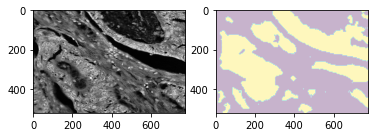

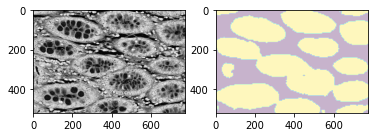

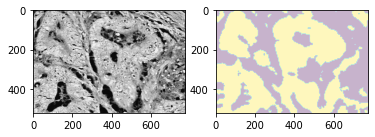

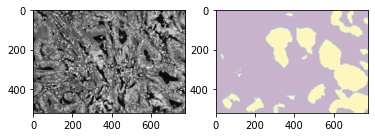

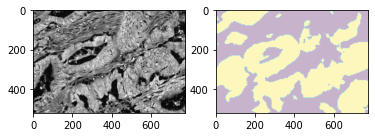

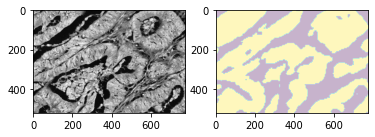

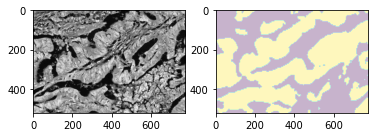

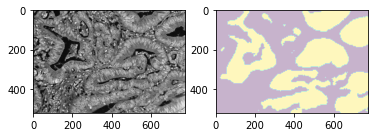

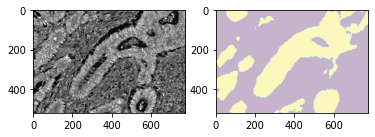

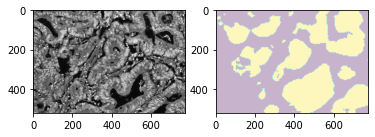

In [ ]:
visualize_results()